In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd 
import numpy as np
from scipy import linalg
from scipy import stats

import matplotlib.pyplot as plt

import mahalanobis as maha

In [38]:
count = 0
for id_ in df['batch_id'].unique():
    if 'BJ' in id_:
        count += 1
    else:
        print(id_)
        print(df[df['batch_id'] == id_]['pair_batch_id'].unique())

print(count)

PHB000001
['single']
DD4386006
['single']
DI1202001
['single']
PHB000008
['single']
PHB000004
['single']
DO8167002
['single']
PHB000006
['single']
PHB000013
['single']
184


In [34]:
count = 0
concentrations = set()

for id_ in df['batch_id'].unique():
    if 'BJ' in id_:
        n_conc = df[df['batch_id'] == id_]['cmpd_conc'].unique()
        concentrations.add(n_conc[0])
        concentrations.add(n_conc[1])
        count += 1
    else:
        print(id_)

print(count)
print(concentrations)

PHB000001
DD4386006
DI1202001
PHB000008
PHB000004
DO8167002
PHB000006
PHB000013
184
{0.83, 0.33, 0.17, 3.33, 10.0}


In [45]:
count = 0
measurements = set()

for id_ in df['combo_id'].unique():
    if id_ > -1:
        df1 = df[df['combo_id'] == id_]
        df2 = df1.loc[:, ['batch_id', 'cmpd_conc']]
        n_measurements = len(df2.drop_duplicates())
        measurements.add(n_measurements)
        count += 1
    else:
        print(id_)

print(count)
print(measurements)

-1
924
{4}


In [47]:
id_ = 'BJ1895920'

df[(df['batch_id'] == id_) & (df['cmpd_conc'] == 3.33) & (df['combo_id'] == 143)]

batch_id  cmpd_conc     type pair_batch_id  combo_id  \
24200  BJ1895920       3.33  treated     BJ1898069       143   
24201  BJ1895920       3.33  treated     BJ1898069       143   
24219  BJ1895920       3.33  treated     BJ1898069       143   
24220  BJ1895920       3.33  treated     BJ1898069       143   
24234  BJ1895920       3.33  treated     BJ1898069       143   
24237  BJ1895920       3.33  treated     BJ1898069       143   
24238  BJ1895920       3.33  treated     BJ1898069       143   
24250  BJ1895920       3.33  treated     BJ1898069       143   
24251  BJ1895920       3.33  treated     BJ1898069       143   
24252  BJ1895920       3.33  treated     BJ1898069       143   
24253  BJ1895920       3.33  treated     BJ1898069       143   
24254  BJ1895920       3.33  treated     BJ1898069       143   
24255  BJ1895920       3.33  treated     BJ1898069       143   
24256  BJ1895920       3.33  treated     BJ1898069       143   
24257  BJ1895920       3.33  treated     BJ1898069       143   

       AreaShape_Area_nuclei  AreaShape_BoundingBoxArea_nuclei  \
24200                 1831.0                            2530.0   
24201                 1839.0                            2501.0   
24219                 1676.0                            2288.0   
24220                 2094.0                            2809.0   
24234                 1826.0                            2530.0   
24237                 1806.0                            2491.0   
24238                 2124.0                            2860.0   
24250                 1728.0                            2430.0   
24251                 1664.0                            2295.0   
24252                 1685.5                            2291.5   
24253                 1704.0                            2408.0   
24254                 1655.0                            2332.0   
24255                 1708.0                            2385.0   
24256                 1719.0                            2376.0   
24257                 1755.5                            2389.5   

       AreaShape_BoundingBoxMaximum_X_nuclei  \
24200                                 1223.0   
24201                                 1097.0   
24219                                 1287.0   
24220                                 1228.0   
24234                                 1305.0   
24237                                 1220.0   
24238                                 1299.0   
24250                                 1244.0   
24251                                 1200.0   
24252                                 1347.0   
24253                                 1074.0   
24254                                 1230.0   
24255                                 1198.0   
24256                                 1240.0   
24257                                 1292.0   

       AreaShape_BoundingBoxMaximum_Y_nuclei  \
24200                                 1338.0   
24201                                 1269.0   
24219                                 1318.0   
24220                                 1231.0   
24234                                 1185.0   
24237                                 1343.0   
24238                                  959.0   
24250                                 1221.0   
24251                                 1254.0   
24252                                 1229.5   
24253                                 1165.0   
24254                                 1294.0   
24255                                 1373.0   
24256                                 1165.0   
24257                                 1232.0   

       AreaShape_BoundingBoxMinimum_X_nuclei  ...  \
24200                                 1171.0  ...   
24201                                 1051.0  ...   
24219                                 1251.0  ...   
24220                                 1183.0  ...   
24234                                 1248.0  ...   
24237                                 1172.0  ...   
24238            

In [3]:
# Remove the redundant columns related to experiment settings

experiment_info_cols = {
    'ImageID',
    'Metadata_AcqID',
    'Metadata_AcqID_cells',
    'Metadata_AcqID_cytoplasm',
    'Metadata_Barcode',
    'Metadata_Site',
    'Metadata_Site_cells',
    'Metadata_Site_cytoplasm',
    'Metadata_Well',
    'Count_nuclei',
    'ImageNumber_nuclei',
    'ObjectNumber_nuclei',
    'barcode',
    'cell_line',    # 'A549'
    'painted',  # '2024-09-26 09:00:00'
    'plateWell',    
    'seeded',   # '2024-09-23 09:00:00'
    'solvent',  # 'DMSO'
    'treatment',
    'compound_name',
    'well_id',
    'plate', 
    'plate-name', 
    'site', 
    'size',
    'plate_type',   # 'PE-6057302' 
    'treatment_units',
    'painted_type', 
    'layout_id', 
    'stock_conc', 
    'pert_type', 
    'cmpd_vol',
    'well_vol', 
    'cells_per_well',   # 4000
    'batchid', 
    'cbkid', 
    'libid', 
    'libtxt',
    'smiles', 
    'inchi', 
    'inkey',
}

In [4]:
# 'Meta' columns = non-morphological features

meta_cols = {
    'batch_id', # Unique identifier of each compound -- find the corresponding compound name in 'id_to_name.txt'
    'cmpd_conc',    # Compound concentration in the given drug combination, in micromoles
    'type', # {'treated', 'infected', 'uninfected'}, i.e., drug combination, DMSO, or healthy, respectively
    'pair_batch_id',    # Batch id of another drug compound in the given combination. If `type`!='treated', then `pair_batch_id`='single'
    'combo_id', # Enumeration of unique drug combinations. If `type`!='treated', then `combo_id`=-1
}

In [6]:
df = pd.read_parquet("data/Covid-Combo.parquet")

In [7]:
# Omit 'uninfected' from the set for predictions
df_cells = df[df['type'] != 'uninfected']
x_cells = df_cells.drop(
    columns=set(meta_cols).intersection(df.columns)
).copy()

In [8]:
df_control = df[df['type'].isin(['uninfected', 'infected'])].copy()
df_control.reset_index(inplace=True, drop=True)

X = df_control.drop(
    columns=set(meta_cols).intersection(df_control.columns)
).copy()

y = np.where(df_control['type'] == 'infected', 0, 1)

#### Whitening and Mahalanobis distance

In [9]:
# There are some methods in literature that allow to automatically select the optimal number of components from PCA
# We employ one such method below: 'svht' from mahalanobis.py

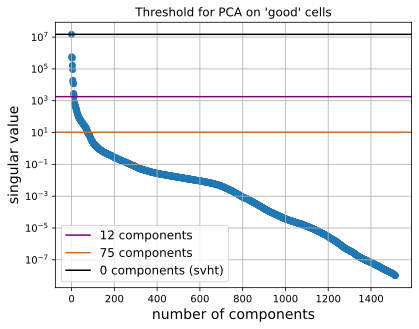

In [10]:
df_good = df[df['type'] == 'uninfected'].copy()
# morphological profile of uninfected cells ('good')
x_good = df_good.drop(
    columns=set(meta_cols).intersection(df.columns)
).to_numpy()

cov_matrix = np.cov(x_good, rowvar=False)
sigma, u = linalg.eigh(cov_matrix, check_finite=True)
rank = min(*x_good.shape) - 1
sigma = sigma[::-1]
# remove values under ~float precision
too_low = len(sigma[sigma>1e-8])
rank = min(rank, too_low)

plt.scatter(range(rank), sigma[:rank])

# manual threshold = 10^3
thresh = sigma[sigma >= 10**3][-1]
n_comp = int(np.where(sigma == thresh)[0][0])
plt.axhline(thresh, c='purple', label=f'{n_comp} components')

# manual threshold = 10
thresh = sigma[sigma >= 10][-1]
n_comp = int(np.where(sigma == thresh)[0][0])
plt.axhline(thresh, c='chocolate', label=f'{n_comp} components')

# optimal threshold for the PCA of 'good' cells
thresh = int(maha.svht(x_good))
plt.axhline(sigma[thresh], c='k', label=f'{thresh} components (svht)')

plt.grid()
plt.yscale('log')
plt.legend(fontsize=12)
plt.xlabel('number of components', fontsize=14)
plt.ylabel('singular value', fontsize=14)
plt.title("Threshold for PCA on 'good' cells")
plt.show()

In [11]:
n_components = 18  # we use a number of components sufficient to make uninfected and infected cells distinguishable
df_good = df[df['type'] == 'uninfected'].copy()
x_good = df_good.drop(
    columns=set(meta_cols).intersection(df.columns)
).copy()

dist_pred = maha.get_distance(x_good, x_cells, n_components=n_components)
df_dist = pd.DataFrame(dist_pred, columns=['distance'])

proba_pred = maha.get_proba(x_good, x_cells, n_components=n_components)
df_proba = pd.DataFrame(proba_pred, columns=['proba'])

#### Concatenate predictions


In [14]:
predictions = pd.concat(
    [
        df_cells[
            ['batch_id', 'cmpd_conc', 'type', 'pair_batch_id', 'combo_id']
        ].reset_index(drop=True), 
        df_dist,
        df_proba,
    ], 
    axis=1,
)

predictions.head()

batch_id  cmpd_conc      type pair_batch_id  combo_id   distance  \
0  PHB000001        0.2  infected        single        -1   9.829012   
1  PHB000001        0.2  infected        single        -1  10.025138   
2  PHB000001        0.2  infected        single        -1  10.164904   
3  PHB000001        0.2  infected        single        -1  10.836796   
4  PHB000001        0.2  infected        single        -1  11.331378   

          proba  
0  9.215961e-13  
1  1.790790e-13  
2  5.428991e-14  
3  1.110223e-16  
4  0.000000e+00

#### Ranking all compounds by distance

Rows in the ranking below correspond to different compounds at different concentrations, i.e., we average over replicates.

In [15]:
def quantile(n):
    def quantile_(x):
        return x.quantile(n)
    quantile_.__name__ = f'q_{n*100:.0f}'
    return quantile_

selected_columns = predictions[[
    'batch_id',
    'combo_id',
    'type',
    'pair_batch_id',
    'cmpd_conc',
    'distance',
    'proba',
]].copy()

# Aggregate replicates
average_predictions = selected_columns.groupby(by=['batch_id', 'combo_id', 'cmpd_conc', 'type', 'pair_batch_id'], as_index=False).agg({
        'distance': [quantile(.25), quantile(.75), 'median'],
        'proba': [quantile(.25), quantile(.75), 'median'],
})

# Rename columns
custom_columns = [''.join(col) for col in average_predictions.columns.to_flat_index() if not col[1]]
custom_columns += ['_'.join(col) for col in average_predictions.columns.to_flat_index() if col[1]]
average_predictions.columns = custom_columns

# Sort by distance to non-infected
average_predictions.sort_values(by=['distance_median'], ascending=True, inplace=True)

# Quantiles are written as plus/minus to the median
average_predictions['distance_q_75'] = average_predictions['distance_q_75'] - average_predictions['distance_median']
average_predictions['distance_q_25'] =  average_predictions['distance_median'] - average_predictions['distance_q_25']
average_predictions['proba_q_75'] = average_predictions['proba_q_75'] - average_predictions['proba_median']
average_predictions['proba_q_25'] =  average_predictions['proba_median'] - average_predictions['proba_q_25']

average_predictions.reset_index(inplace=True, drop=True)
average_predictions.to_csv("output/Covid_combo_ranked.csv", sep=';', index=False)
average_predictions.head(5)

batch_id  combo_id  cmpd_conc     type pair_batch_id  distance_q_25  \
0  BJ1898404       148       3.33  treated     BJ1895608       0.525895   
1  BJ1898163       449       3.33  treated     BJ1895296       0.455795   
2  BJ1895591       758      10.00  treated     BJ1897675       0.204715   
3  BJ1896240       374      10.00  treated     BJ1897268       0.358672   
4  BJ1894559       836      10.00  treated     BJ1895013       0.363510   

   distance_q_75  distance_median  proba_q_25  proba_q_75  proba_median  
0       0.580156         3.807452    0.317561    0.209667      0.694124  
1       1.004825         3.975396    0.471394    0.224497      0.602097  
2       0.408831         3.979381    0.224929    0.108670      0.603981  
3       0.820588         4.031732    0.400252    0.186835      0.574759  
4       0.453836         4.057127    0.245955    0.190785      0.560383

In [16]:
def plot_compounds_separately(compounds, negative=None, n_components=None, metric='distance'):

    if n_components is None:
        raise ValueError("Please, specify the number of components used in Mahalanobis distance computation")

    y_metric = f"{metric}_median"
    y_metric_q_25 = f"{metric}_q_25"
    y_metric_q_75 = f"{metric}_q_75"

    drugs = compounds[compounds['type'] == 'treated']

    conf_intervals = [0.5, 0.75]
    healthy_left = dict()
    healthy_right = dict()
    for conf in conf_intervals:
        if metric == 'distance':
            left_sq, right_sq = stats.chi2.interval(confidence=conf, df=n_components)
            healthy_left[conf], healthy_right[conf] = np.sqrt(left_sq), np.sqrt(right_sq)        
        elif metric == 'proba':
            healthy_left[conf],  healthy_right[conf] = conf, 1
        
    if negative is not None:
        # neg_median = negative[y_metric].iloc[0]
        neg_left = negative[y_metric].iloc[0] - negative[y_metric_q_25].iloc[0]
        neg_right = negative[y_metric].iloc[0] + negative[y_metric_q_75].iloc[0]

    if metric == 'distance':
        if negative is None:
            ymin, ymax = min(healthy_left.values()), 3*max(healthy_right.values())
        else:
            ymin, ymax = min(healthy_left.values()), neg_right + 1
    elif metric == 'proba':
        ymin, ymax = 0, 1

    batch_ids = drugs['batch_id'].unique()
    cols = 4
    rows = len(batch_ids) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
    fig.tight_layout()

    # Iterate over compounds
    for r in range(rows):
        for c in range(cols):
            i = r * 4 + c
            batch_id = batch_ids[i]
            combo_ids = drugs[drugs['batch_id'] == batch_id]['combo_id'].unique()
            drug_concentrations = set()
            for combo_id in combo_ids:
                compound = drugs[(drugs['batch_id'] == batch_id) & (drugs['combo_id'] == combo_id)]
                sort_arg = np.argsort(compound['cmpd_conc'])

                conc = compound['cmpd_conc'].to_numpy()[sort_arg]
                y_values = compound[y_metric].to_numpy()[sort_arg]
                y_perc_25 = compound[y_metric_q_25].to_numpy()[sort_arg]
                y_perc_75 = compound[y_metric_q_75].to_numpy()[sort_arg]
                # axs[r, c].plot(
                #     conc, y_values, 
                #     # label=f'combination id: {combo_id}'
                # )
                axs[r, c].errorbar(
                    conc, y_values, yerr=[y_perc_25, y_perc_75], 
                    capsize=2, elinewidth=1.5, #fmt='o-', 
                    label=f'combination id: {combo_id}'
                )
                drug_concentrations = drug_concentrations.union(set(conc))

            x_ticks = list(drug_concentrations)
            
            # Uninfected cells - confidence intervals
            for i, conf in enumerate(conf_intervals):
                label = "Non-infected" if i == 0 else None
                axs[r, c].fill_between(x_ticks, healthy_left[conf], healthy_right[conf], 
                                color='royalblue', alpha=0.5*(1-conf)**0.5, 
                                zorder=1, label=label
                    )
            axs[r, c].text(
                (x_ticks[0]+x_ticks[-1])/2, (healthy_left[conf]+healthy_right[conf])/2, 
                'Non-infected', ha='center', va='center', alpha=0.4
            )
            
            if negative is not None:
                # Negative state (DMSO)
                axs[r, c].fill_between(
                    x_ticks, neg_left, neg_right, 
                    color='k', alpha=0.25, zorder=1,
                )
                axs[r, c].text(
                    (x_ticks[0]+x_ticks[-1])/2, (neg_left+neg_right)/2,
                    'DMSO', ha='center', va='center', alpha=0.4,
                )

            axs[r, c].set_title(compound['name'].iloc[0])
            axs[r, c].set_xticks(x_ticks)
            # axs[r, c].set_xscale('log')
            axs[r, c].set_ylim(ymin, ymax)
            if c == 0:
                axs[r, c].set_ylabel(f'{metric}')
            if r == rows - 1:
                axs[r, c].set_xlabel('concentration')

    fig.savefig(f"output/Covid-combo-{metric}.png", dpi=300, bbox_inches="tight")


In [17]:
compounds = average_predictions.copy()
compounds['conc'] = average_predictions['cmpd_conc']

negative = compounds[compounds['type'] == 'infected'].copy()    # infected & non-treated
compounds = compounds[compounds['type'] == 'treated']

In [18]:
# If we want to use batch_id's as compound identifiers
compounds['name'] = compounds['batch_id']
compounds['pair_name'] = compounds['pair_batch_id']

In [19]:
# If we want to use compound names instead of batch_id's
with open("data/id_to_name.txt", 'r') as file:
    table = file.readlines()
id_to_name = {}
for i, line in enumerate(table):
    id_, name = line.rstrip().split('\t')
    id_to_name[id_] = name

def fill_missing_name(batch_id):
    if batch_id in id_to_name:
        return id_to_name[batch_id]
    else:
        return f"Batch_id: {batch_id}"

compounds['name'] = compounds['batch_id'].map(fill_missing_name)
compounds['pair_name'] = compounds['pair_batch_id'].map(fill_missing_name)

In [20]:
plot_compounds_separately(compounds, negative, n_components)

In [ ]:
plot_compounds_separately(compounds, negative, n_components, metric='proba')

In [ ]:
# # Run this cell to install the library for interactive graphs

# !pip3 install plotly
# !pip3 install --upgrade nbformat

In [ ]:
import plotly.express as px


def plot_one_compound(compounds, batch_id, negative=None, n_components=None, metric='distance'):

    if n_components is None:
        raise ValueError("Please, specify the number of components used in Mahalanobis distance computation")

    y_metric = f"{metric}_median"
    y_metric_q_25 = f"{metric}_q_25"
    y_metric_q_75 = f"{metric}_q_75"

    compound = compounds[compounds['batch_id'] == batch_id]

    fig = px.line(
        compound.sort_values(by="cmpd_conc"), x="cmpd_conc", y=y_metric,
        color='pair_name',
        # color='combo_id',
        width=800, height=400, markers=True,
        error_y=y_metric_q_75, error_y_minus=y_metric_q_25,
        # category_orders={'pair_name': compounds['pair_name']},
    )

    # Healthy cells - confidence intervals
    for i, conf in enumerate([0.5, 0.75]):
        label = dict(
            text="Uninfected", font=dict(size=15, color="black"), textposition="middle left"
        ) if i == 0 else None

        if metric == 'distance':
            left, right = stats.chi2.interval(confidence=conf, df=n_components)
            left, right = np.sqrt(left), np.sqrt(right)
            
        elif metric == 'proba':
            left, right = conf, 1

        fig.add_hrect(
            type="rect",
            y0=left, y1=right,
            fillcolor="royalblue", opacity=0.8*(1-conf)**0.5,
            layer="below", line_width=0, label=label
        )

    # Negative state (DMSO)
    if negative is not None:
        conc = range(0, 31, 1)
        median = negative[y_metric].iloc[0]
        neg_left = median - negative[y_metric_q_25].iloc[0]
        neg_right = median + negative[y_metric_q_75].iloc[0]
        fig.add_hrect(
            type="rect",
            y0=neg_left, y1=neg_right,
            fillcolor="grey", opacity=0.25,
            layer="below", line_width=0,
            label=dict(
                text="DMSO", font=dict(size=15, color="black"), textposition="middle left"
            )
        )

    if metric == 'distance':
        if negative is not None:
            ymin, ymax = left, neg_right + 1
        else:
            ymin, ymax = left, max(compound[y_metric]+compound[y_metric_q_75])
    elif metric == 'proba':
        ymin, ymax = 0, 1

    conc = np.unique(compounds['cmpd_conc'])
    fig.update_xaxes(title_text="concentration", gridcolor='lightgrey', type="log", tickvals=conc)
    if metric == 'distance':
        # fig.update_yaxes(title_text='distance', gridcolor='lightgrey', type="log", tickvals=[1, 5, 10, 100], range=[ymin, ymax])
        fig.update_yaxes(title_text='distance', gridcolor='lightgrey', range=[ymin, ymax])
    elif metric == 'proba':
        fig.update_yaxes(title_text='probability', gridcolor='lightgrey', tickvals=[1, 5, 10, 100])

    fig.update_layout(
        title_text=compound['name'].iloc[0],
        plot_bgcolor='white',
        legend_title="Pair",
    )

    fig.show()


In [ ]:
sel_batch_id = 'BJ1895013'  # 'BJ1895608'
# sel_batch_id = 'DO8167002'    # anti-viral

plot_one_compound(compounds, batch_id=sel_batch_id, negative=negative, n_components=n_components)

In [ ]:
plot_one_compound(compounds, batch_id=sel_batch_id, negative=negative, n_components=n_components, metric='proba')